In [6]:
import pandas as pd
import numpy as np
import re
import warnings
warnings.filterwarnings('ignore')
path="../../data/"
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

from OSGridConverter import grid2latlong

'''
Helper function to find out columns containing specific text
'''
def findcols(df,text):
    return [col for col in df.columns if text in col]

In [7]:
def combineanalyse(df1,df2):
    df_out=pd.merge(df1,df2,left_on='eid',right_on='n_eid',how='left')
    return df_out    

In [8]:

dis_vars=['n_eid','Age_Today','AD','PD','Diag_Date_AD','years_bef_diagAD','Age_Diag_AD',
                           'date_of_attending_assessment_centre_f53', 'age_when_attended_assessment_centre_f21003',
                           'EPIL','DIAB','CELIAC','CERVASC','CERVASC_bef','CERVASCALL_bef','EPIL_bef','DIAB_bef']

shap_vars2=['eid','sex_f31','Genotype','particulate_matter_air_pollution_pm25_2010_f24006','airpoll_24006','airpoll_24007',
       'mean_time_to_correctly_identify_matches_f20023','rounded_matches_f20023','urea_f30670',
       'number_of_treatmentsmedications_taken_f137','nitrogen_dioxide_air_pollution_2006_f24017',
       'sleeplessness_insomnia_f1200',
       'particulate_matter_air_pollution_pm25_absorbance_2010_f24007','mean_corpuscular_volume_f30040',
       'never_eat_eggs_dairy_wheat_sugar_f6144',
       'uk_east_coord',
       'parental_ad_status','qualifications_f6138',
       'uk_north_coord',
       'particulate_matter_air_pollution_pm10_2010_f24005',
       'time_spent_driving_f1090', 'creactive_protein_f30710',
       'alanine_aminotransferase_f30620','aspartate_aminotransferase_f30650',
       'answered_sexual_history_questions_f2129',
       'neutrophill_count_f30140', 'carer_support_indicators_f41214',
       'drive_faster_than_motorway_speed_limit_f1100',
       'history_of_psychiatric_care_on_admission_f41218',
       'particulate_matter_air_pollution_2510um_2010_f24008',
       'frequency_of_solariumsunlamp_use_f2277',
       'hand_grip_strength_left_f46', 'glycated_haemoglobin_hba1c_f30750',
       'frequency_of_tenseness_restlessness_in_last_2_weeks_f2070',
       'forced_expiratory_volume_in_1second_fev1_best_measure_f20150','diabetes_diagnosed_by_doctor_f2443','overall_health_rating_f2178']



shapvars3=['difference_in_mobile_phone_use_compared_to_two_years_previously_f1140',
       'drive_faster_than_motorway_speed_limit_f1100',
       'drive_faster_than_motorway_speed_limit_f1100',
       'frequency_of_tenseness_restlessness_in_last_2_weeks_f2070',
       'met_minutes_per_week_for_walking_f22037',
       'never_eat_eggs_dairy_wheat_sugar_f6144',
       'nitrogen_dioxide_air_pollution_2006_f24017',
       'nitrogen_oxides_air_pollution_2010_f24004',
       'particulate_matter_air_pollution_2510um_2010_f24008',
       'particulate_matter_air_pollution_pm10_2007_f24019',
       'particulate_matter_air_pollution_pm10_2010_f24005',
       'particulate_matter_air_pollution_pm25_2010_f24006',
       'particulate_matter_air_pollution_pm25_absorbance_2010_f24007',
       'sleeplessness_insomnia_f1200', 'tea_intake_f1488',
       'time_spent_driving_f1090',
       'traffic_intensity_on_the_nearest_major_road_f24011',
       'usual_walking_pace_f924', 'water_intake_f1528']


shap_vars2=np.unique(np.concatenate([shap_vars2,shapvars3]))


shap_vars=['year_of_birth_f34','place_of_birth_in_uk_east_coordinate_f130',\
           'number_of_treatmentsmedications_taken_f137',
 'time_spent_using_computer_f1080',
 'sleeplessness_insomnia_f1200',
 'ever_had_samesex_intercourse_f2159',
 'longstanding_illness_disability_or_infirmity_f2188',
 'frequency_of_solariumsunlamp_use_f2277',
 'diabetes_diagnosed_by_doctor_f2443',
 'mothers_age_at_death_f3526',
 'never_eat_eggs_dairy_wheat_sugar_f6144',
 'mean_time_to_correctly_identify_matches_f20023',
 'particulate_matter_air_pollution_pm25_2010_f24006',
 'carer_support_indicators_f41214',
 'death',
 'parental_ad_status',
 'Genotype']

vars_analyse=['eid','Genotype','recent_feelings_of_depression_f20510','sleeplessness_insomnia_f1200','parental_ad_status',
      'particulate_matter_air_pollution_pm25_2010_f24006',
      'number_of_symbol_digit_matches_made_correctly_f20159','sex_f31',
      'type_of_special_diet_followed_f20086','ever_used_hormonereplacement_therapy_hrt_f2814'
      ]

In [9]:
ukb_tp0=pd.read_pickle('%s%s' % (path,'ukb_tp0.p'))
diseases_bin=pd.read_pickle('%s%s' % (path,'ukb_disease_labels.p'))
outputs_score=pd.read_pickle('%s%s' % (path,'outputs_score.p'))


In [10]:
modify_score=pd.read_pickle('%s%s' % (path,'score_rbn_modif_A.p'))
modify_score.columns=['eid','mean_score_mod','std_score_mod']
outputs_score=pd.read_pickle('%s%s' % (path,'fullmodel_scores.p'))

In [11]:
ADscores=pd.read_csv('%s%s' % (path,'AD_model_full_risk_scores.csv'))
ADscores=ADscores[['eid','risk_score']]

In [170]:
#score_rebal=pd.read_pickle('%s%s' % (path,'score_rebal.p'))
score_rebal=pd.read_pickle('%s%s' % (path,'modelscore.p'))
score_rebal.columns=['eid','risk_score']
score_rebal=score_rebal[['eid','risk_score']]

In [130]:
countvars=pd.DataFrame(ukb_tp0.count()).reset_index()
countvars.columns=['variable','recs']
countvars.to_csv("countvars.csv")

Variable summaries

In [131]:
ukb_tp0['rounded_matches_f20023']=(ukb_tp0['mean_time_to_correctly_identify_matches_f20023']/50).round()*10
ukb_tp0['airpoll_24006']=ukb_tp0['particulate_matter_air_pollution_pm25_2010_f24006'].round()
ukb_tp0['airpoll_24007']=ukb_tp0['particulate_matter_air_pollution_pm25_absorbance_2010_f24007'].round()
ukb_tp0['uk_north_coord']=(ukb_tp0['place_of_birth_in_uk_north_coordinate_f129']/100000).round()*100000
ukb_tp0['uk_east_coord']=(ukb_tp0['place_of_birth_in_uk_east_coordinate_f130']/100000).round()*100000

#### Data Filtering

In [132]:
maskAD=(diseases_bin['AD']==1)
mask_death=(diseases_bin['death']==1)
mask_ADdiag=(diseases_bin['years_bef_diagAD']>2)
eids_ADDiag=diseases_bin['n_eid'][~mask_ADdiag|(mask_death&~maskAD)]

mask_ukb0_AD=(ukb_tp0['eid'].isin(eids_ADDiag))
print(ukb_tp0[mask_ukb0_AD].shape)

mask_age=(ukb_tp0['Age_Today']>=70)
ukb_tp0_red=ukb_tp0[mask_age&mask_ukb0_AD]
print(ukb_tp0_red.shape)

(432881, 1527)
(221299, 1527)


0.4178127046496398

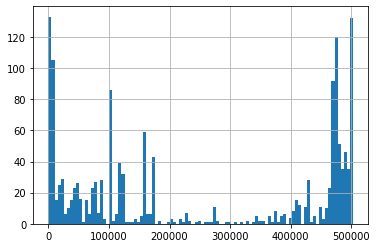

In [133]:
countdf=pd.DataFrame(ukb_tp0.count()).reset_index()
countdf.columns=['var','recs']
countdf['recs'].hist(bins=100)
mask80=(countdf['recs']>0.8*countdf['recs'].max())
countdf[mask80].shape[0]/countdf.shape[0]

In [134]:
def calc_cols(df,maxrecs=10,mincount=0.8,minctcts=0.8):
    ohe_cols=\
    [col for col in df.columns if len(df[col].value_counts())<maxrecs and df[col].count()/df[col].shape[0]>mincount]
    
    print(r'Total ohe variables = %0.0f ' % (len(ohe_cols)))
    
    cts_cols=[col for i,col in enumerate(df.columns) if 'float64'\
    in str(df.dtypes[i]) and len(df[col].value_counts())>=maxrecs and df[col].count()/len(df[col])>minctcts]
    
    print(len(ohe_cols))
    print(len(cts_cols))
    return ohe_cols,cts_cols


In [135]:
calc_cols(ukb_tp0_red)

Total ohe variables = 391 
391
161


(['sex_f31',
  'birth_weight_known_f120',
  'number_of_selfreported_cancers_f134',
  'type_of_accommodation_lived_in_f670',
  'own_or_rent_accommodation_lived_in_f680',
  'average_total_household_income_before_tax_f738',
  'usual_walking_pace_f924',
  'frequency_of_stair_climbing_in_last_4_weeks_f943',
  'frequency_of_friendfamily_visits_f1031',
  'drive_faster_than_motorway_speed_limit_f1100',
  'length_of_mobile_phone_use_f1110',
  'getting_up_in_morning_f1170',
  'morningevening_person_chronotype_f1180',
  'nap_during_day_f1190',
  'sleeplessness_insomnia_f1200',
  'snoring_f1210',
  'daytime_dozing_sleeping_narcolepsy_f1220',
  'current_tobacco_smoking_f1239',
  'past_tobacco_smoking_f1249',
  'smokingsmokers_in_household_f1259',
  'oily_fish_intake_f1329',
  'nonoily_fish_intake_f1339',
  'processed_meat_intake_f1349',
  'poultry_intake_f1359',
  'lambmutton_intake_f1379',
  'pork_intake_f1389',
  'cheese_intake_f1408',
  'milk_type_used_f1418',
  'spread_type_f1428',
  'bread_typ

In [136]:
diseases_bin['years_bef_diagAD'].mean()

8.51882325700735

#### Important variables

In [171]:
ukb_shap=ukb_tp0[shap_vars2]
ukb_shap=pd.merge(ukb_shap,diseases_bin[dis_vars],left_on='eid',right_on='n_eid',how='left')
ukb_shap=pd.merge(ukb_shap,score_rebal,on='eid',how='inner')
ukb_shap=pd.merge(ukb_shap,modify_score,on='eid',how='left')

In [172]:
apoe_mask=(ukb_shap['Genotype']=="e4/e4")|(ukb_shap['Genotype']=="e3/e4")|(ukb_shap['Genotype']=="e2/e4")

ukb_shap['APOE']=0
ukb_shap['APOE'][(apoe_mask)]=1

In [173]:
df=pd.DataFrame(ukb_shap.groupby(['sex_f31','APOE','AD']).agg({'Age_Today':['sum','count','mean','std']})).reset_index()
df.columns=['Gender','APOE','AD','Age_sum','Age_count','Age_mean','Age_std']
df

df2=pd.DataFrame(ukb_shap.groupby(['AD']).agg({'Age_Today':['sum','count','mean','std']})).reset_index()
df2.columns=['AD','Age_sum','Age_count','Age_mean','Age_std']
df2

print(ukb_shap['Age_Today'].mean())
print(ukb_shap['Age_Today'].std())

75.21060725775936
3.3411241773293545


In [174]:
ukb_shap['alan_aspar_rat']=round((ukb_shap['aspartate_aminotransferase_f30650']\
                                  /ukb_shap['alanine_aminotransferase_f30620']),1)
total_AD=ukb_shap['AD'].sum()
total_risk=ukb_shap['risk_score'].sum()
riskfact=total_AD/total_risk
ukb_shap['risk_score_norm']=ukb_shap['risk_score']*riskfact

total_risk_mod=ukb_shap['mean_score_mod'].sum()
riskfact_mod=total_AD/total_risk_mod
ukb_shap['risk_score_norm_mod']=ukb_shap['mean_score_mod']*riskfact_mod

mask=pd.notnull(ukb_shap['Age_Diag_AD'])&(ukb_shap['Age_Diag_AD']!=0)
ukb_shap['Age_Today_Rd']=round(ukb_shap['Age_Today'],0)
ukb_shap['Age_Diag_Rd']=round(ukb_shap['Age_Diag_AD'],0)

uqvalue=ukb_shap['risk_score'].quantile(0.75)
lqvalue=ukb_shap['risk_score'].quantile(0.25)

mask_lq=(ukb_shap['risk_score']<lqvalue)
mask_hq=(ukb_shap['risk_score']>uqvalue)
mak_iqr=(ukb_shap['risk_score']>=lqvalue)&(ukb_shap['mean_score_mod']<=uqvalue)

ukb_shap['Risk_Group']=''
ukb_shap['Risk_Group'][mask_lq]='3. Low'
ukb_shap['Risk_Group'][mak_iqr]='2. Medium'
ukb_shap['Risk_Group'][mask_hq]='1. High'

ukb_shap['risk_score_index']=ukb_shap['risk_score_norm']/ukb_shap['risk_score_norm'].mean()
ukb_shap['risk_score_index_mod']=ukb_shap['risk_score_norm_mod']/ukb_shap['risk_score_norm_mod'].mean()

ukb_shap.to_csv('%s%s' % (path,'ukb_shap.csv'))

In [175]:
variable_completeness=pd.DataFrame(ukb_shap.count()/ukb_shap.shape[0]).reset_index()
variable_completeness.columns=['variable','ratio']
variable_completeness.sort_values(by='ratio',ascending=False).head(30)
variable_completeness.to_csv('variable_completeness.csv')


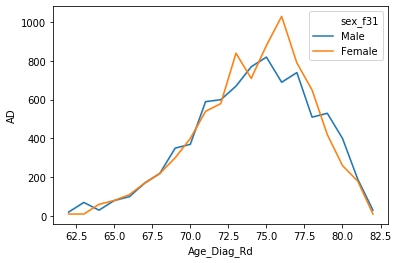

In [176]:
sns.lineplot(data=ukb_shap[['Age_Diag_Rd','AD','sex_f31']][mask], x='Age_Diag_Rd', y='AD',hue='sex_f31',estimator='sum')
plt.show()

In [177]:
def summariseAD(var,df=ukb_shap):
    return df.groupby(var)['AD'].agg({'mean_AD':'mean'})

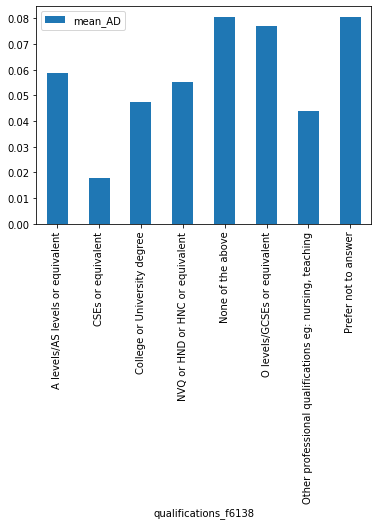

In [178]:
#summariseAD('sleeplessness_insomnia_f1200')
#summariseAD('Genotype')
summariseAD(['qualifications_f6138'],df=ukb_shap[(ukb_shap['Genotype']=='e4/e4')]).plot(kind='bar')

In [179]:
import numpy as np
import scipy
import scipy.stats

from scipy import stats

def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, m-h, m+h

apoe_mask=(ukb_shap['Genotype']=="e4/e4")|(ukb_shap['Genotype']=="e3/e4")|(ukb_shap['Genotype']=="e2/e4")
age_mask=(ukb_shap['Age_Today']>70)

apoe_set=ukb_shap['Age_Today'][apoe_mask&age_mask]
non_apoe_set=ukb_shap['Age_Today'][~apoe_mask&age_mask]

stats.ttest_ind(apoe_set,non_apoe_set, equal_var = False)

print(mean_confidence_interval(apoe_set))
print(mean_confidence_interval(non_apoe_set))

(75.42231989793063, 75.41310391679937, 75.4315358790619)
(75.44541133754961, 75.43961510455685, 75.45120757054238)


In [180]:
varssum=['Risk_Group','Genotype','particulate_matter_air_pollution_pm25_2010_f24006',
       'mean_time_to_correctly_identify_matches_f20023','urea_f30670','alan_aspar_rat',
       'number_of_treatmentsmedications_taken_f137','nitrogen_dioxide_air_pollution_2006_f24017',
       'sleeplessness_insomnia_f1200',
       'particulate_matter_air_pollution_pm25_absorbance_2010_f24007','mean_corpuscular_volume_f30040',
       'parental_ad_status',
       'alanine_aminotransferase_f30620','aspartate_aminotransferase_f30650',
       'neutrophill_count_f30140','risk_score','APOE',"AD"]

In [181]:
mask_ap=(ukb_shap['APOE']==1)

pd.DataFrame(ukb_shap[varssum][mask_ap].groupby(['Risk_Group']).mean().transpose())

Risk_Group,,1. High,2. Medium,3. Low
particulate_matter_air_pollution_pm25_2010_f24006,10.038590,9.946770,9.816254,9.849291
mean_time_to_correctly_identify_matches_f20023,571.555103,598.768986,564.834700,545.015515
urea_f30670,5.625633,5.739827,5.552554,5.534921
alan_aspar_rat,1.217215,1.336084,1.261046,1.190386
number_of_treatmentsmedications_taken_f137,2.707594,3.439334,2.534685,1.718079
nitrogen_dioxide_air_pollution_2006_f24017,29.342969,28.490836,27.322152,27.361186
particulate_matter_air_pollution_pm25_absorbance_2010_f24007,1.189225,1.167860,1.149515,1.151202
mean_corpuscular_volume_f30040,91.178215,91.570253,91.319435,90.982339
parental_ad_status,0.169086,0.250957,0.248307,0.155052
alanine_aminotransferase_f30620,23.797658,22.034310,23.252105,24.190985


In [182]:
pd.DataFrame(ukb_shap.groupby(['AD','sex_f31']).size()).reset_index()


,AD,sex_f31,0
0,0.0,Female,934860
1,0.0,Male,765640
2,1.0,Female,8250
3,1.0,Male,7950


In [183]:
pd.DataFrame(ukb_shap[(ukb_shap['Age_Today']>70)].groupby(['AD','APOE']).size()).reset_index()

,AD,APOE,0
0,0.0,0,1177090
1,0.0,1,454760
2,1.0,0,5930
3,1.0,1,10140


In [184]:
sumchar=pd.DataFrame(ukb_shap[(ukb_shap['Age_Today']>70)].groupby(['AD','APOE'])['Age_Today'].\
agg({'mean_age':'mean','std_age':'std','recs':'count'})).reset_index()

sumchar['lb_age']=sumchar['mean_age']-sumchar['std_age']
sumchar['ub_age']=sumchar['mean_age']+sumchar['std_age']

sumchar['age']=round(sumchar['mean_age'],1).astype(str)+' +/- '+round(sumchar['std_age'],1).astype(str)

AD_mask=(sumchar['AD']==1)
APOE_mask=(sumchar['APOE']==1)
sumchar['Type']='Control'
sumchar['Type'][AD_mask]='AD'

sumchar['APOE4 Carrier']='No'
sumchar['APOE4 Carrier'][APOE_mask]='Yes'


sumchar[['Type','APOE4 Carrier','age']]

,Type,APOE4 Carrier,age
0,Control,No,75.4 +/- 3.2
1,Control,Yes,75.4 +/- 3.2
2,AD,No,77.4 +/- 3.1
3,AD,Yes,77.6 +/- 2.9


In [185]:
from scipy.stats import t


In [186]:
from scipy import stats
def pvalue_slopes(df,var):
    
    mask_aspnnull=(pd.notnull(ukb_shap[var]))
    apoe_mask=(df['Genotype']=="e4/e4")|(df['Genotype']=="e3/e4")|(df['Genotype']=="e2/e4")
    
    rng_apoe=(df[mask_aspnnull&apoe_mask][var].max()-df[mask_aspnnull&apoe_mask][var].min())
    
    slope_ap, intercept_ap, r_value_ap, p_value_ap, std_err_ap = \
    stats.linregress(ukb_shap[mask_aspnnull&apoe_mask][var],ukb_shap[mask_aspnnull&apoe_mask]['AD'])
    
    slope_ap_fin=slope_ap*rng_apoe
    
    x=ukb_shap[mask_aspnnull&apoe_mask][var]
    tinv = lambda p, df: abs(t.ppf(p/2, df))
    ts = tinv(0.05, len(x)-2)
    apoe_CI=ts*std_err_ap*rng_apoe

    
    #from scipy.stats import t
    #tinv = lambda p, df: abs(t.ppf(p/2, df)
    
        #print(slope_ap)
    rng_nonapoe=ukb_shap[mask_aspnnull&~apoe_mask][var].max()-ukb_shap[mask_aspnnull&~apoe_mask][var].min()
    slope_nonap, intercept_nonap, r_value_nonap, p_value_nonap, std_err_nonap = \
    stats.linregress(ukb_shap[mask_aspnnull&~apoe_mask][var],ukb_shap[mask_aspnnull&~apoe_mask]['AD'])
    #print(slope_nonap)
    
    slope_nonap_fin=slope_nonap*rng_nonapoe
    
    x=ukb_shap[mask_aspnnull&~apoe_mask][var]
    tinv = lambda p, df: abs(t.ppf(p/2, df))
    ts = tinv(0.05, len(x)-2)
    nonapoe_CI=ts*std_err_ap*rng_nonapoe

    numerator = slope_ap - slope_nonap
    denominator = pow((pow(std_err_ap,2) + pow(std_err_nonap,2)), 1/2)
    z=numerator/denominator  
    #print(z)

    p_value = stats.norm.sf(abs(z))
    
    return slope_ap_fin,slope_nonap_fin,p_value,apoe_CI,nonapoe_CI
    

In [187]:
def lines_conf(var,df=ukb_shap,minsamp=2000,regplot=0,rounded=1,factdiv=1,riskscore=0,rat='subt',e4e4=0):
    ukb_shap_var=df[['eid',var,'APOE','Genotype','AD','risk_score_norm']]
    
    mask=(ukb_shap_var['APOE']==1)
    maske4=(ukb_shap_var['Genotype']=='e4/e4')
    ukb_shap_var['APOE Status']=ukb_shap_var['APOE']
    
    ukb_shap_var['APOE Status'][~mask]='Non APOE4 Carriers'
    if e4e4==1:
        ukb_shap_var['APOE Status'][mask]='Single APOE4 Carriers'
        ukb_shap_var['APOE Status'][maske4]='APOE4 Carriers e4/e4'
        
    else:
        ukb_shap_var['APOE Status'][mask]='APOE4 Carriers'
    
    
    
    ukb_shap_var[var+'rounded']=round(ukb_shap_var[var]/factdiv,rounded)*factdiv
    dfgp=pd.DataFrame(ukb_shap_var.groupby(['APOE Status',var+'rounded']).agg({'AD':['mean','count','sum']})).reset_index()
    dfgp.columns=['APOE Status',var+'rounded','AD Incidence Rate','recs','total_AD']
    mask=(dfgp['recs']>=minsamp)
    dfgp=dfgp[mask]
    ukb_shap_var=pd.merge(ukb_shap_var,dfgp,on=['APOE Status',var+'rounded'],how='inner')
    
    if e4e4==1:
        maskapoe=(dfgp['APOE Status']=='Single APOE4 Carriers')|(dfgp['APOE Status']=='APOE4 Carriers e4/e4')
    else:
        maskapoe=(dfgp['APOE Status']=='APOE4 Carriers')
    
    dfgp_apoe=dfgp[maskapoe]
    dfgp_apoe.rename(columns={'AD Incidence Rate':'APOERate'},inplace=True)
    dfgp_non_apoe=dfgp[~maskapoe]
    dfgp_non_apoe.rename(columns={'AD Incidence Rate':'nonAPOERate'},inplace=True)
    df_gp_apoenon=pd.merge(dfgp_apoe[[var+'rounded','APOERate']],
                           dfgp_non_apoe[[var+'rounded','nonAPOERate']],on=var+'rounded',how='inner')
    
    if rat=='mult':
        yname='Ratio: APOE4 to non APOE4 Incidence'
        df_gp_apoenon[yname]=df_gp_apoenon['APOERate']/df_gp_apoenon['nonAPOERate']
    elif rat=='subt':
        yname='Difference: APOE4 - non APOE4 Incidence'
        df_gp_apoenon[yname]=df_gp_apoenon['APOERate']-df_gp_apoenon['nonAPOERate']
    
    
    plt.show()
    
    if riskscore==0:
        ax=sns.lineplot(data=ukb_shap_var, x=var+'rounded', y='AD',hue='APOE Status',estimator='mean')
        ax.set(xlabel=var,ylabel='AD Incidence Rate')
        plt.show()
    if riskscore==1:
        ax=sns.lineplot(data=ukb_shap_var, x=var+'rounded', y='risk_score_norm',hue='APOE Status',estimator='mean')
        ax.set(xlabel=var,ylabel='AD Risk Score')
        plt.show()
        
    
    if regplot==1:
        #sns.lineplot(data=df_gp_apoenon, x=var+'rounded', y='ratio',estimator='mean')
        sns.regplot(data=df_gp_apoenon, x=var+'rounded', y=yname)
        plt.show()
        
        slope, intercept, r_value, p_value, std_err = \
        stats.linregress(df_gp_apoenon[var+'rounded'],df_gp_apoenon[yname])

        x=df_gp_apoenon[var+'rounded']
        tinv = lambda p, df: abs(t.ppf(p/2, df))
        ts = tinv(0.05, len(x)-2)
        slope_CI=ts*std_err
        print(f"slope (95%): {slope:.6f} +/- {slope_CI:.6f}")
        #sns.regplot(data=dfgp, x=var+'rounded', y='AD Incidence Rate')
        #plt.show()
    else:
        sns.lineplot(data=df_gp_apoenon, x=var+'rounded', y=yname,estimator='mean')
    #plt.show()
    

In [188]:
mask_geno=(pd.notnull(ukb_shap['Genotype']))
ukb_shap_geno=ukb_shap[mask_geno]

In [189]:
ukb_shap.shape

(1716700, 74)

In [190]:
varsloop=['Age_Today','alan_aspar_rat','alanine_aminotransferase_f30620',
          'number_of_treatmentsmedications_taken_f137','mean_time_to_correctly_identify_matches_f20023',
          'CERVASCALL_bef','urea_f30670','particulate_matter_air_pollution_pm25_2010_f24006',
         'creactive_protein_f30710']
varnames=['Age','ALT:AST Ratio','ALT','number of treatments/medications','mean time to identify matches',
         'cerebrovascular disease','urea','particulate_matter_air_pollution','creactive_protein']

In [191]:
apoe_slope_arr=np.asarray([])
non_apoe_slope_arr=np.asarray([])
pvalue_arr=np.asarray([])
apoe_CI_arr=np.asarray([])
non_apoe_CI_arr=np.asarray([])


varname_arr=np.asarray([])


for i,var in enumerate(varsloop):
    apoe_slope=round(pvalue_slopes(ukb_shap,var)[0],4)
    non_apoe_slope=round(pvalue_slopes(ukb_shap,var)[1],4)
    pvalue=pvalue_slopes(ukb_shap,var)[2]
    apoe_CI=pvalue_slopes(ukb_shap,var)[3]
    non_apoe_CI=pvalue_slopes(ukb_shap,var)[4]
    
    if round(pvalue,4)!=0:
        pvalue=round(pvalue,5)
        
    
    apoe_slope_arr=np.append(apoe_slope_arr,apoe_slope)
    non_apoe_slope_arr=np.append(non_apoe_slope_arr,non_apoe_slope)
    apoe_CI_arr=np.append(apoe_CI_arr,apoe_CI)
    non_apoe_CI_arr=np.append(non_apoe_CI_arr,non_apoe_CI)
    pvalue_arr=np.append(pvalue_arr,pvalue)
    varname_arr=np.append(varname_arr,varnames[i])
    
df1=pd.DataFrame({'variable':varname_arr,'apoe_slope':apoe_slope_arr,'apoe_CI':apoe_CI_arr,'non_apoe_CI':non_apoe_CI_arr,
                  'non_apoe_slope':non_apoe_slope_arr,'pvalue':pvalue_arr})

df1['apoe_slope']=df1['apoe_slope'].astype(str)+'+/-'+round(df1['apoe_CI'],4).astype(str)
df1['non_apoe_slope']=df1['non_apoe_slope'].astype(str)+'+/-'+round(df1['non_apoe_CI'],4).astype(str)

In [192]:
df1.drop(columns=['apoe_CI','non_apoe_CI'])

,variable,apoe_slope,non_apoe_slope,pvalue
0,Age,0.0625+/-0.0017,0.0129+/-0.0017,0.000000e+00
1,ALT:AST Ratio,0.0879+/-0.0069,0.0128+/-0.0102,1.425085e-101
2,ALT,-0.0769+/-0.0146,-0.0031+/-0.0166,5.208257e-22
3,number of treatments/medications,0.0708+/-0.004,0.0274+/-0.0045,1.933787e-101
4,mean time to identify matches,0.087+/-0.0058,0.0221+/-0.0063,1.128339e-104
5,cerebrovascular disease,0.0324+/-0.0018,0.0112+/-0.0018,5.517472e-103
6,urea,0.0003+/-0.0096,0.0122+/-0.0097,1.043000e-02
7,particulate_matter_air_pollution,0.0237+/-0.0043,0.013+/-0.0053,9.182114e-09
8,creactive_protein,0.0017+/-0.0083,0.008+/-0.0083,7.693000e-02


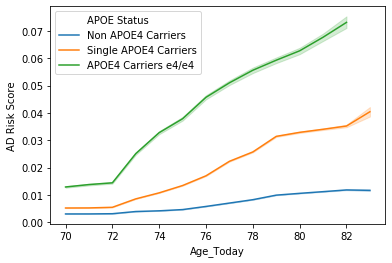

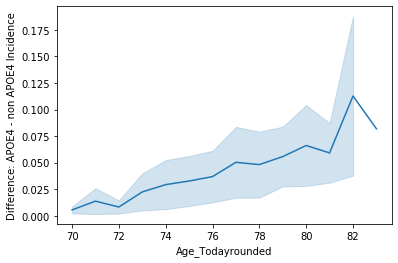

In [193]:
lines_conf('Age_Today',df=ukb_shap_geno,minsamp=100,rounded=0,regplot=0,e4e4=1,riskscore=1)


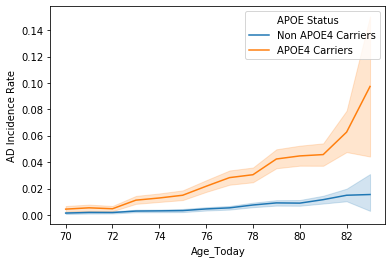

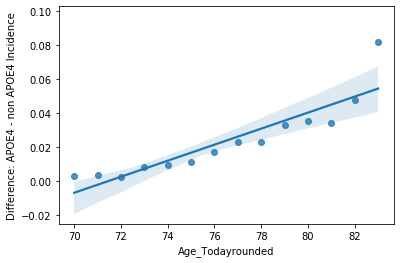

slope (95%): 0.004713 +/- 0.001415


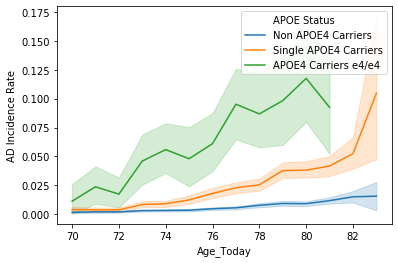

0.005503109340023603


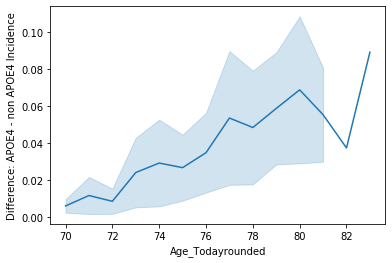

In [161]:
lines_conf('Age_Today',df=ukb_shap_geno,minsamp=100,rounded=0,regplot=1)
lines_conf('Age_Today',df=ukb_shap_geno,minsamp=100,rounded=0,regplot=0,e4e4=1)
print(pvalue_slopes(ukb_shap_geno,'Age_Today')[3])

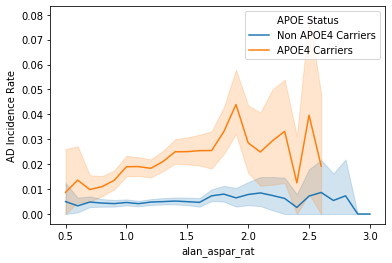

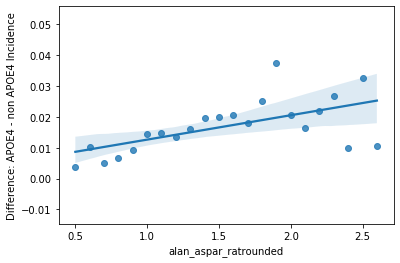

slope (95%): 0.007910 +/- 0.004930


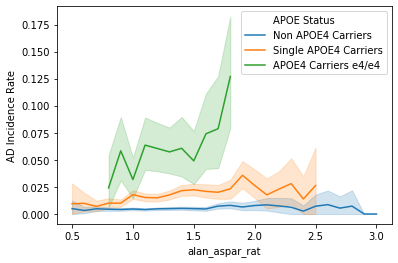

0.02263642980792882


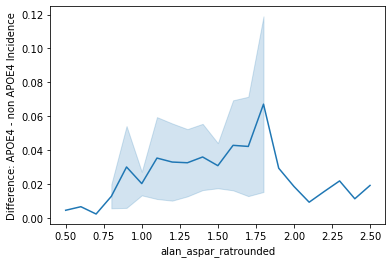

In [90]:
lines_conf('alan_aspar_rat',df=ukb_shap_geno,minsamp=100,riskscore=0,regplot=1)
lines_conf('alan_aspar_rat',df=ukb_shap_geno,minsamp=100,riskscore=0,regplot=0,e4e4=1)
print(pvalue_slopes(ukb_shap_geno,'alan_aspar_rat')[3])

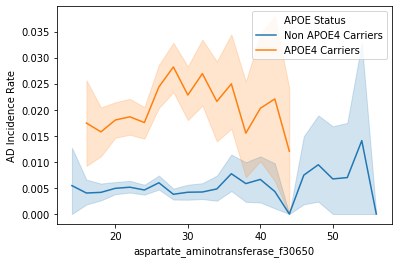

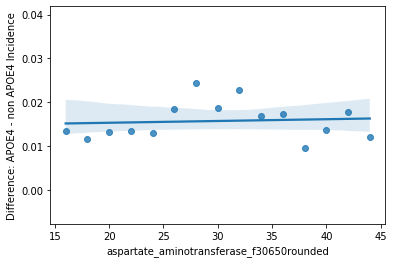

slope (95%): 0.000040 +/- 0.000279


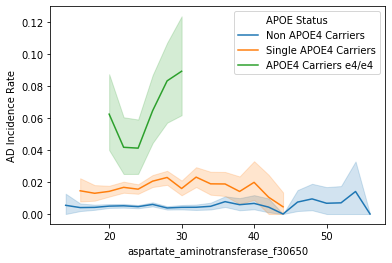

0.09803704095188834


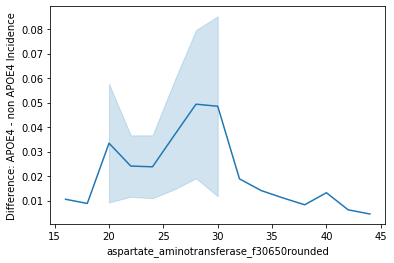

In [91]:
lines_conf('aspartate_aminotransferase_f30650',df=ukb_shap_geno,minsamp=200,factdiv=20,riskscore=0,regplot=1)
lines_conf('aspartate_aminotransferase_f30650',df=ukb_shap_geno,minsamp=200,factdiv=20,riskscore=0,regplot=0,e4e4=1)
print(pvalue_slopes(ukb_shap_geno,'aspartate_aminotransferase_f30650')[3])

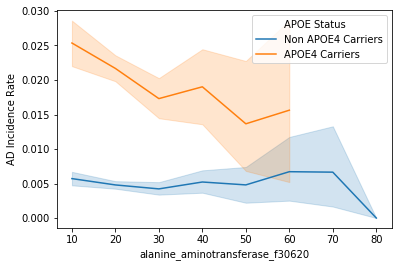

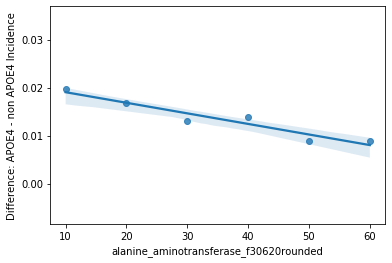

slope (95%): -0.000220 +/- 0.000090


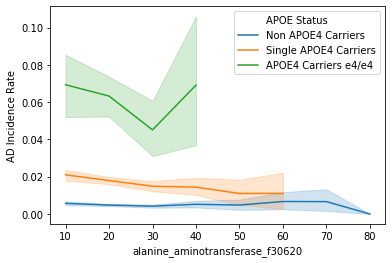

0.04810620915664834


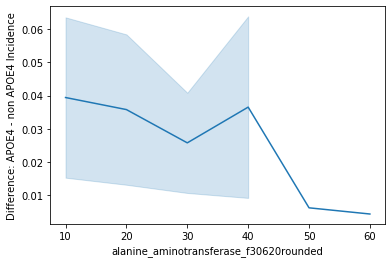

In [92]:
lines_conf('alanine_aminotransferase_f30620',minsamp=200,rounded=0,factdiv=10,regplot=1)
lines_conf('alanine_aminotransferase_f30620',minsamp=200,rounded=0,factdiv=10,regplot=0,e4e4=1)
print(pvalue_slopes(ukb_shap,'alanine_aminotransferase_f30620')[3])

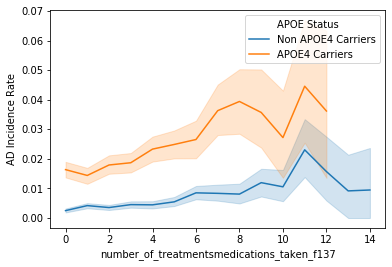

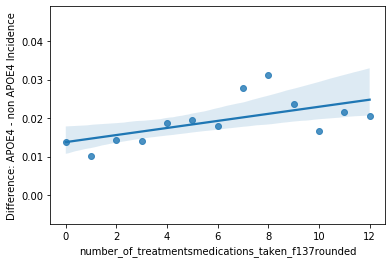

slope (95%): 0.000921 +/- 0.000798


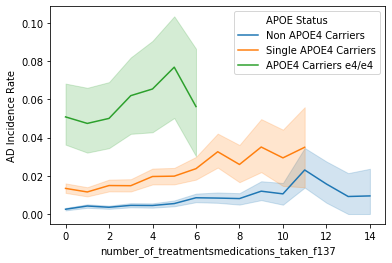

0.013194236939896919


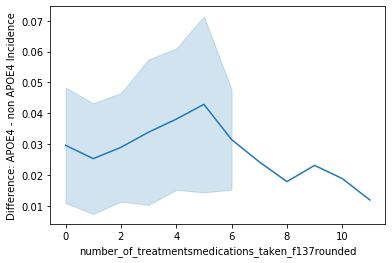

In [93]:
lines_conf('number_of_treatmentsmedications_taken_f137',df=ukb_shap_geno,minsamp=200,regplot=1)
lines_conf('number_of_treatmentsmedications_taken_f137',df=ukb_shap_geno,minsamp=200,regplot=0,e4e4=1)
print(pvalue_slopes(ukb_shap_geno,'number_of_treatmentsmedications_taken_f137')[3])

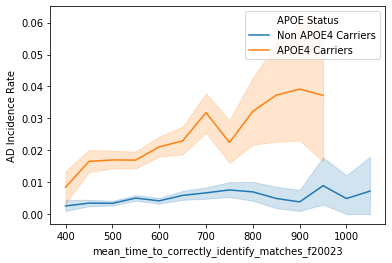

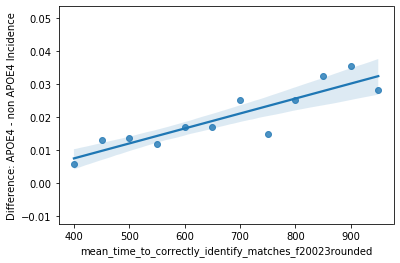

slope (95%): 0.000045 +/- 0.000016


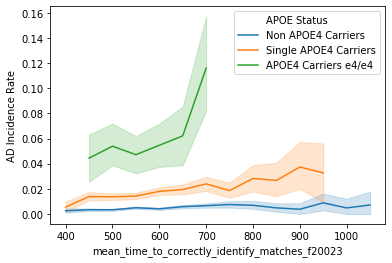

0.018911259633354386


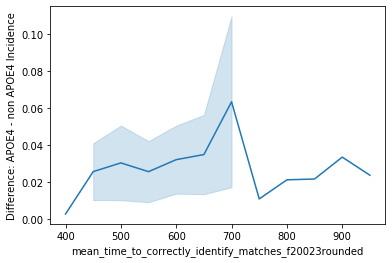

In [94]:
lines_conf('mean_time_to_correctly_identify_matches_f20023',df=ukb_shap_geno,minsamp=200,rounded=0,factdiv=50,regplot=1)
lines_conf('mean_time_to_correctly_identify_matches_f20023',df=ukb_shap_geno,minsamp=200,rounded=0,factdiv=50,regplot=0,e4e4=1)
print(pvalue_slopes(ukb_shap_geno,'mean_time_to_correctly_identify_matches_f20023')[3])

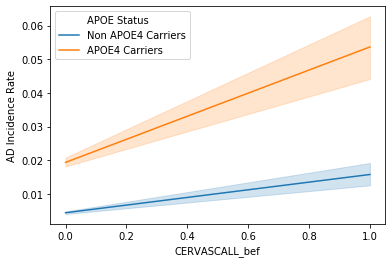

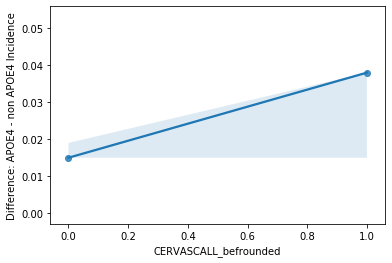

slope (95%): 0.022947 +/- nan


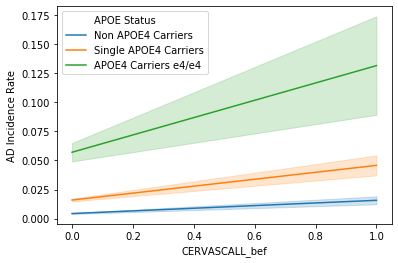

0.006003348085272494


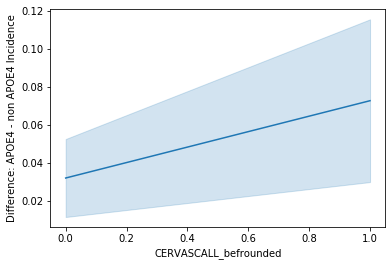

In [95]:
lines_conf('CERVASCALL_bef',minsamp=1000,df=ukb_shap_geno,rounded=1,factdiv=1,regplot=1)
lines_conf('CERVASCALL_bef',minsamp=100,df=ukb_shap_geno,rounded=1,factdiv=1,regplot=0,e4e4=1)
print(pvalue_slopes(ukb_shap_geno,'CERVASCALL_bef')[3])

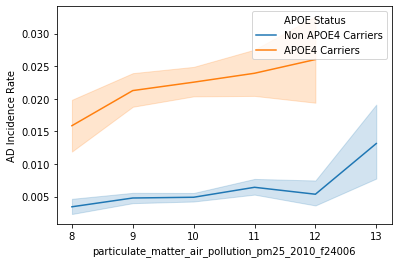

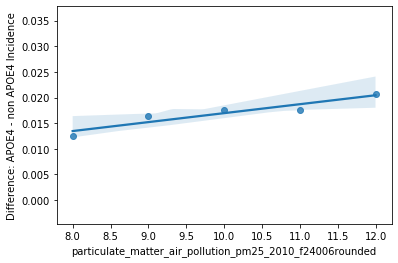

slope (95%): 0.001747 +/- 0.001254


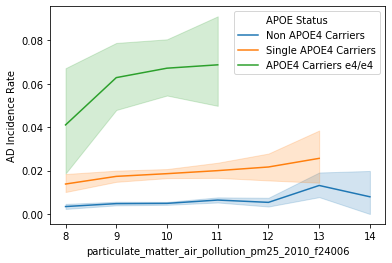

0.014164736785758726


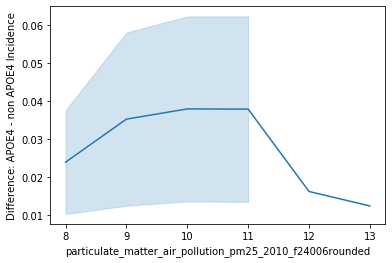

In [96]:
lines_conf('particulate_matter_air_pollution_pm25_2010_f24006',df=ukb_shap_geno,minsamp=1000,rounded=0,factdiv=1,regplot=1)
lines_conf('particulate_matter_air_pollution_pm25_2010_f24006',df=ukb_shap_geno,minsamp=200,rounded=0,factdiv=1,regplot=0,e4e4=1)
print(pvalue_slopes(ukb_shap_geno,'particulate_matter_air_pollution_pm25_2010_f24006')[3])

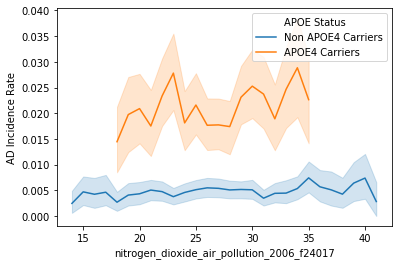

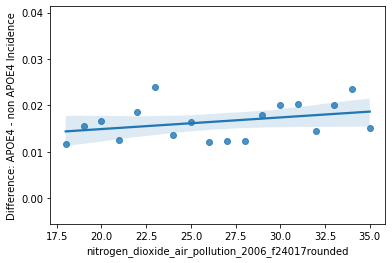

slope (95%): 0.000251 +/- 0.000365


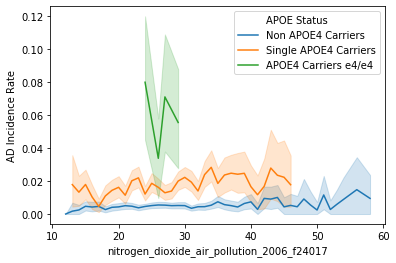

0.018291519395802775


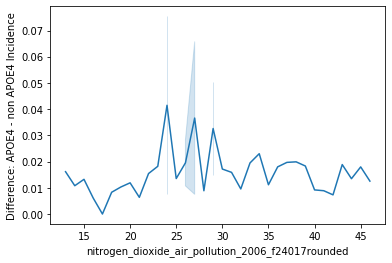

In [97]:
lines_conf('nitrogen_dioxide_air_pollution_2006_f24017',df=ukb_shap_geno,minsamp=1000,rounded=0,factdiv=1,regplot=1)
lines_conf('nitrogen_dioxide_air_pollution_2006_f24017',df=ukb_shap_geno,minsamp=200,rounded=0,factdiv=1,regplot=0,e4e4=1)
print(pvalue_slopes(ukb_shap_geno,'nitrogen_dioxide_air_pollution_2006_f24017')[3])

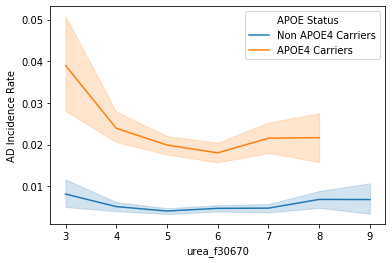

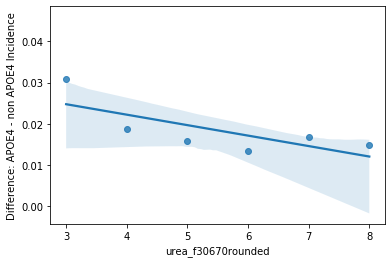

slope (95%): -0.002537 +/- 0.003163


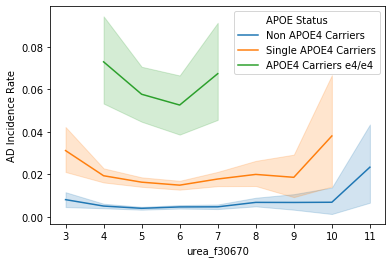

0.031242230131371222


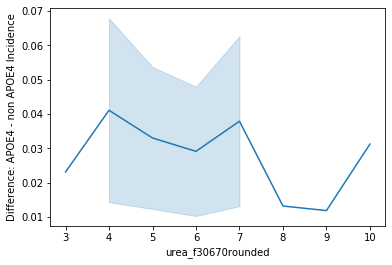

In [98]:
lines_conf('urea_f30670',df=ukb_shap_geno,minsamp=1000,rounded=0,factdiv=1,regplot=1)
lines_conf('urea_f30670',df=ukb_shap_geno,minsamp=200,rounded=0,factdiv=1,regplot=0,e4e4=1)
print(pvalue_slopes(ukb_shap_geno,'urea_f30670')[3])


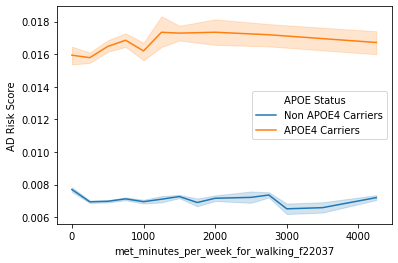

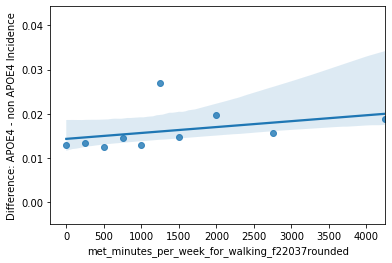

slope (95%): 0.000001 +/- 0.000003


In [859]:
lines_conf('met_minutes_per_week_for_walking_f22037',minsamp=1000,rounded=0,regplot=1,factdiv=250,riskscore=1)

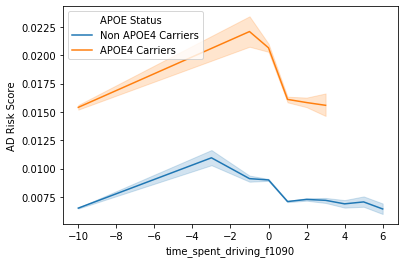

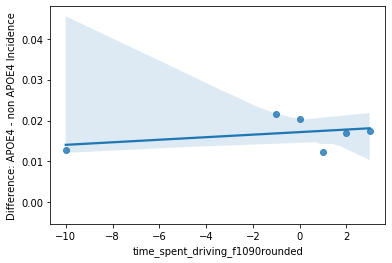

slope (95%): 0.000311 +/- 0.001045


In [860]:
lines_conf('time_spent_driving_f1090',minsamp=500,rounded=0,regplot=1,factdiv=1,riskscore=1)

In [819]:
findcols(ukb_shap,'walking')
#lines_conf('alan_aspar_rat',minsamp=2000,riskscore=1)

['met_minutes_per_week_for_walking_f22037', 'usual_walking_pace_f924']

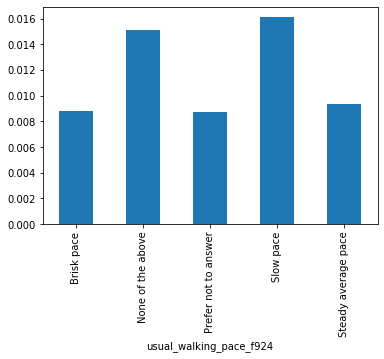

In [822]:
ukb_shap.groupby(['usual_walking_pace_f924'])['AD'].mean().plot(kind='bar')
#ukb_shap.groupby(['usual_walking_pace_f924'])['AD'].size().plot(kind='bar')

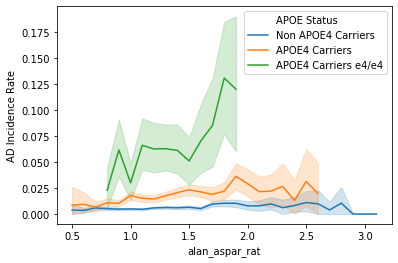

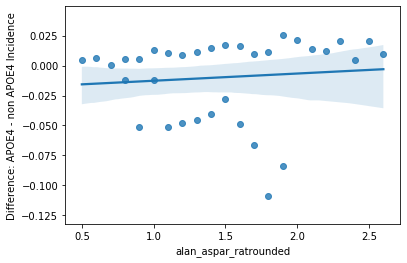

slope (95%): 0.006016 +/- 0.021641


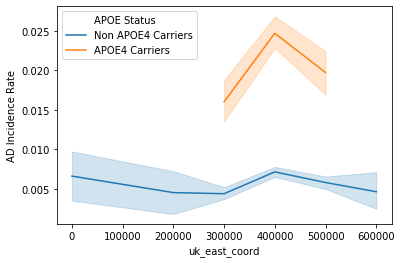

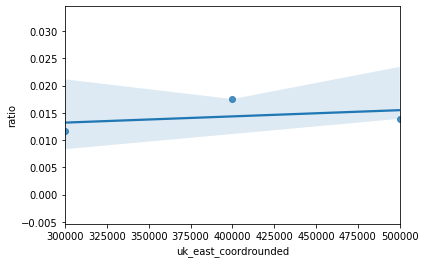

slope (95%): 0.000000 +/- 0.000000


In [768]:
lines_conf('uk_east_coord',minsamp=1000,rounded=0,factdiv=1,regplot=1)

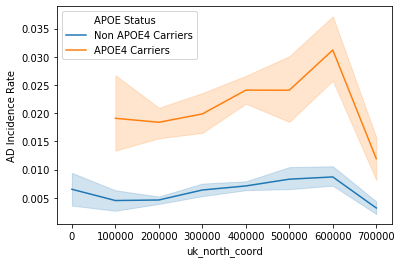

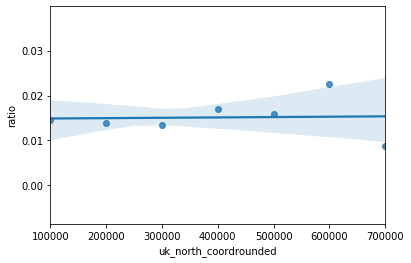

slope (95%): 0.000000 +/- 0.000000


In [769]:

lines_conf('uk_north_coord',minsamp=1000,rounded=0,factdiv=1,regplot=1)


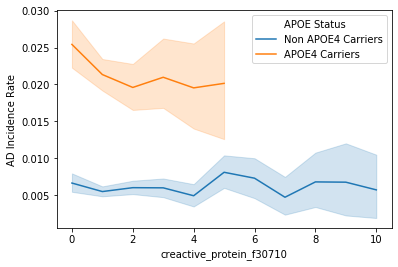

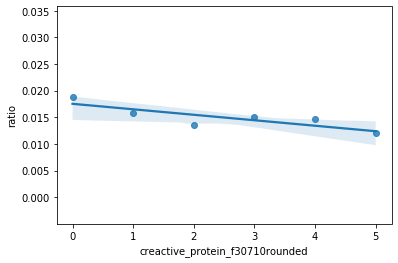

slope (95%): -0.001028 +/- 0.000903


In [770]:
lines_conf('creactive_protein_f30710',minsamp=1000,rounded=0,factdiv=1,regplot=1)

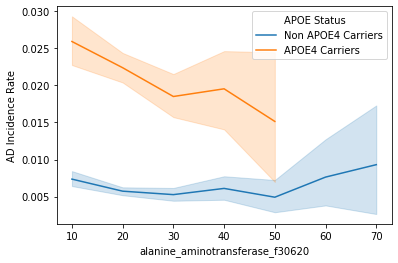

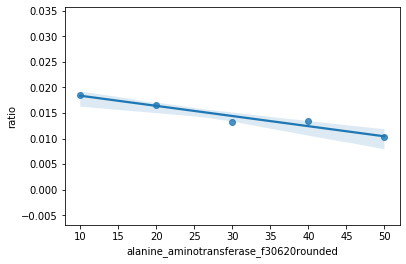

slope (95%): -0.000199 +/- 0.000093


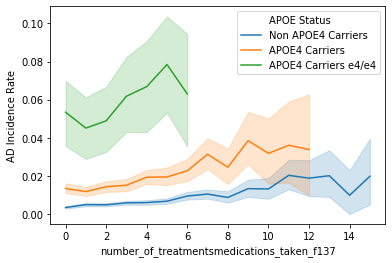

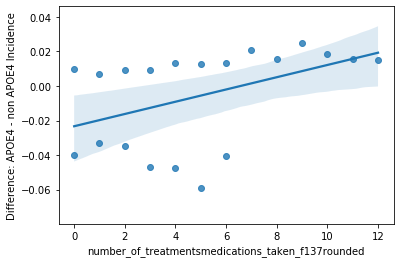

slope (95%): 0.003548 +/- 0.003509


In [874]:
lines_conf('number_of_treatmentsmedications_taken_f137',minsamp=200,regplot=1)

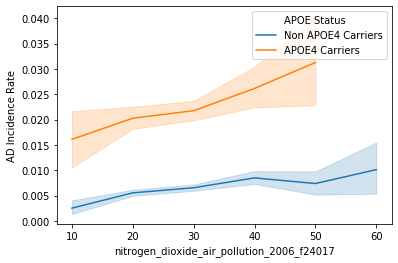

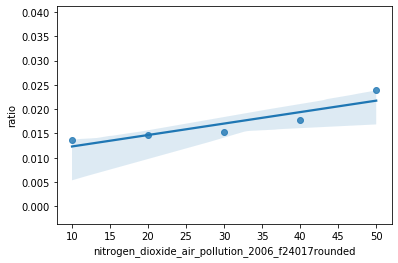

slope (95%): 0.000236 +/- 0.000206


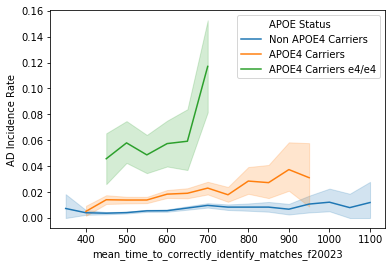

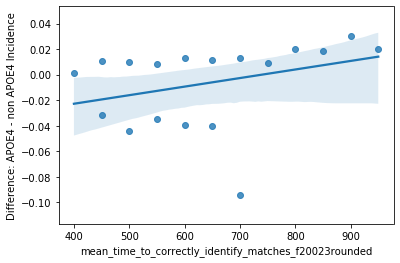

slope (95%): 0.000067 +/- 0.000102


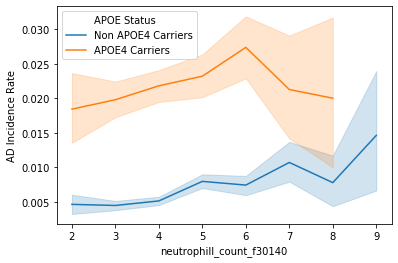

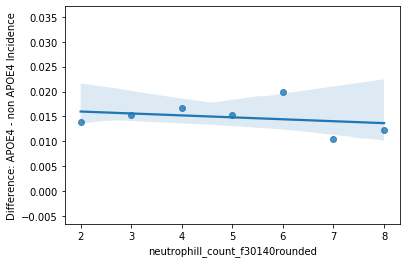

slope (95%): -0.000390 +/- 0.001563


In [780]:
lines_conf('neutrophill_count_f30140',minsamp=500,rounded=0,factdiv=1,regplot=1)

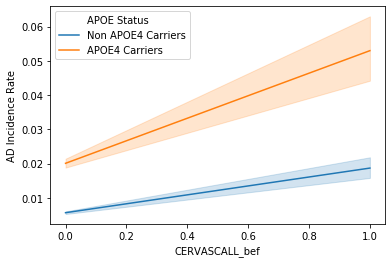

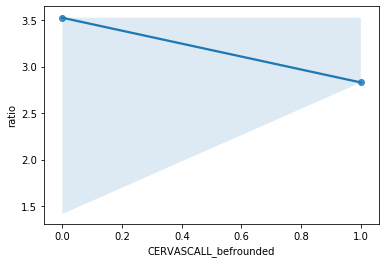

slope (95%): -0.696005 +/- nan


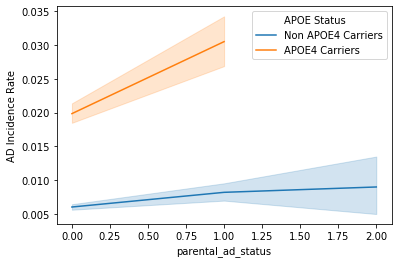

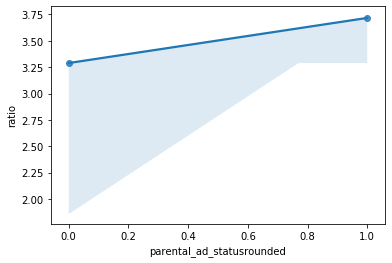

slope (95%): 0.427399 +/- nan


In [729]:
lines_conf('parental_ad_status',minsamp=2000,rounded=0,regplot=1)

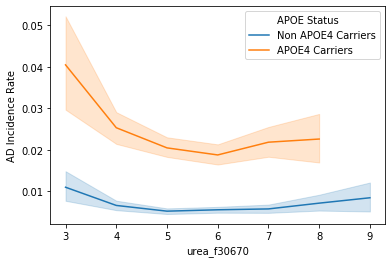

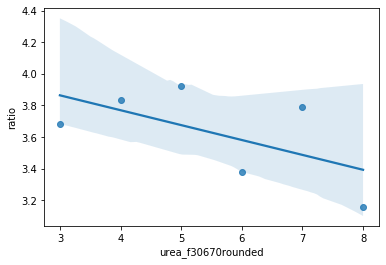

slope (95%): -0.094213 +/- 0.176781


In [730]:
lines_conf('urea_f30670',minsamp=1000,rounded=0,factdiv=1,regplot=1)


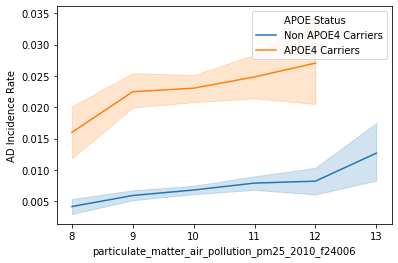

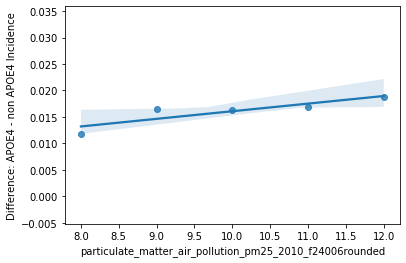

slope (95%): 0.001438 +/- 0.001409


In [781]:
#findcols(ukb_shap,'poll')


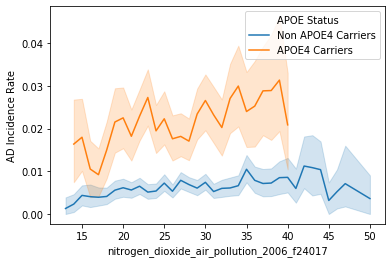

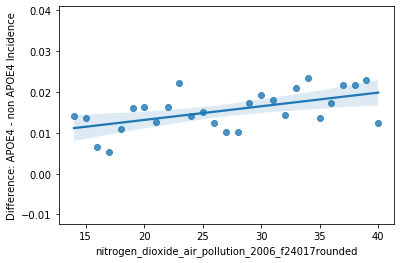

slope (95%): 0.000334 +/- 0.000208


In [782]:
#findcols(ukb_shap,'poll')


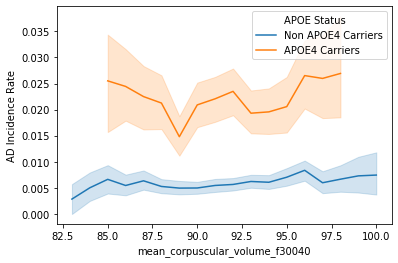

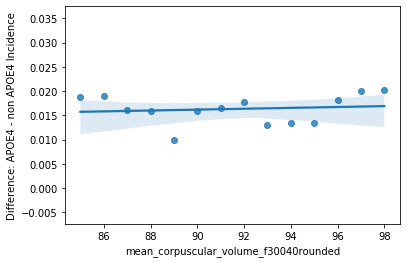

slope (95%): 0.000090 +/- 0.000447


In [783]:
lines_conf('mean_corpuscular_volume_f30040',minsamp=1000,rounded=0,factdiv=1,regplot=1)

In [538]:
findcols(ukb_shap,'neutrophi')

['neutrophill_count_f30140']

Age
AST:ALT


(0.0878658738068163,
 0.02055176124559813,
 1.31317947927811e-10,
 0.021964531782376458,
 0.03231865162826186)

In [412]:
pvalue_slopes(ukb_shap,'parental_ad_status')

(0.022746859961769627, 0.00738177298790145, 0.001775912811409043)

(0.06231043948345492, 0.017641567581860827, 3.767290095300867e-52)

In [414]:
pvalue_slopes(ukb_shap,'alanine_aminotransferase_f30620')

(-0.07396238528092462, -0.004168762831086536, 0.0029811384808023883)

In [415]:
pvalue_slopes(ukb_shap,'mean_corpuscular_volume_f30040')


(0.016549402429009017, 0.014257364617751542, 0.34684205529486833)

In [416]:
pvalue_slopes(ukb_shap,'CERVASCALL_bef')

(0.032866323494333216, 0.013019848593298496, 2.9105875095349667e-10)

In [378]:
pvalue_slopes(ukb_shap,'alanine_aminotransferase_f30620')

(-0.0827565983132417, 0.0032891481297208387, 0.022658872536247408)

In [379]:
pvalue_slopes(ukb_shap,'nitrogen_dioxide_air_pollution_2006_f24017')

(0.06745755636785968, 0.02245181696552291, 0.000261989465428118)

In [505]:
mask_urea=(ukb_shap['urea_f30670']<10)
pvalue_slopes(ukb_shap[(mask_urea)],'urea_f30670')

(-0.00871030947204409, 0.00011126342419463213, 0.03931137372907719)

In [381]:
pvalue_slopes(ukb_shap,'neutrophill_count_f30140')

(0.02358871760505745, 0.0419032666855676, 0.344470163702973)

In [382]:
pvalue_slopes(ukb_shap,'mean_time_to_correctly_identify_matches_f20023')

(0.09053028286501787, 0.04048218685891396, 0.0006083558650179738)

In [204]:
pvalue_slopes(ukb_shap,'urea_f30670')

(-0.00040467883122812415, 9.486866827667166e-05, 0.2821123557786127)

In [224]:
pvalue_slopes(ukb_shap,'number_of_treatmentsmedications_taken_f137')

(0.09242074397941755, 0.034687124765710176, 1.6234015755345207e-07)

In [211]:
pvalue_slopes(ukb_shap,'Age_Today')

(0.006122481228121703, 0.001986583072916756, 1.7725687403670234e-11)

In [214]:
pvalue_slopes(ukb_shap,'CERVASC_bef')

(0.07829763684433223, 0.025759398975073147, 1.7852429762015782e-13)

In [213]:
findcols(ukb_shap,'CERV')

['CERVASC', 'CERVASC_bef']

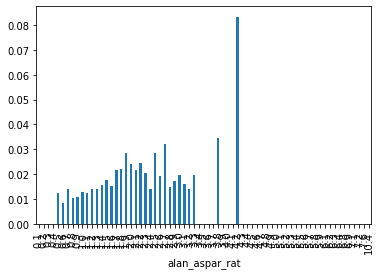

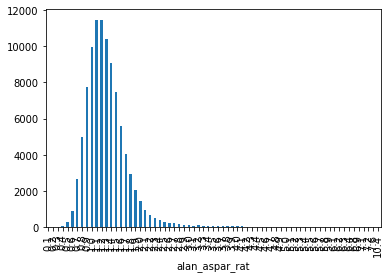

In [134]:
ukb_shap.groupby(['alan_aspar_rat'])['AD'].mean().plot(kind='bar')
plt.show()
ukb_shap.groupby(['alan_aspar_rat']).size().plot(kind='bar')

In [84]:
findcols(ukb_shap,'diabetes')

['diabetes_diagnosed_by_doctor_f2443']

In [85]:
mask_dbd=(ukb_shap['diabetes_diagnosed_by_doctor_f2443']=="Yes")
ukb_shap[['DIAB', 'DIAB_bef','diabetes_diagnosed_by_doctor_f2443']][(mask_dbd)].groupby(['DIAB', 'DIAB_bef']).size()

DIAB  DIAB_bef
0.0   0.0          860
1.0   0.0          144
      1.0         6485
dtype: int64

In [91]:
ukb_shap['AD'][(ukb_shap['DIAB']==0)&mask_dbd].mean()/ukb_shap['AD'].mean()

0.23036621224271586

In [95]:
ukb_shap['AD'][mask_dbd].mean()/ukb_shap['AD'].mean()

1.8782428788276446

In [93]:
ukb_shap['AD'][(ukb_shap['DIAB_bef']==1)].mean()/ukb_shap['AD'].mean()

0.822907341760065

In [ ]:
ukb_shap['eid'][]

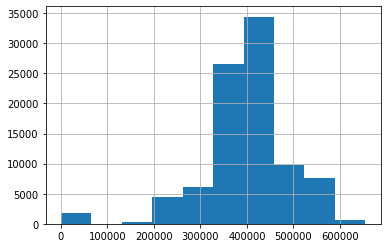

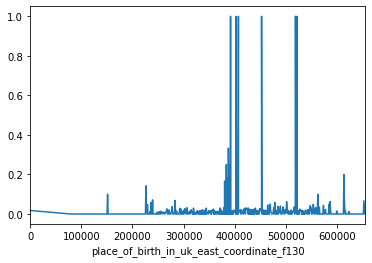

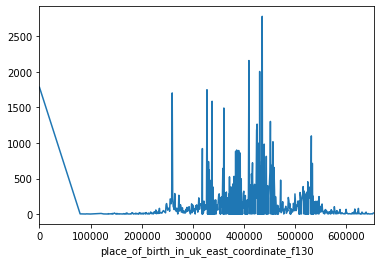

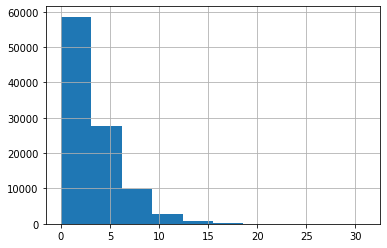

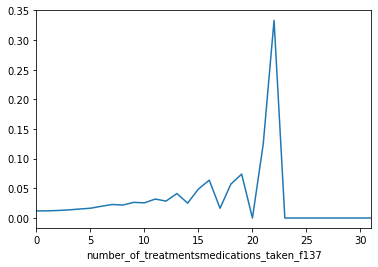

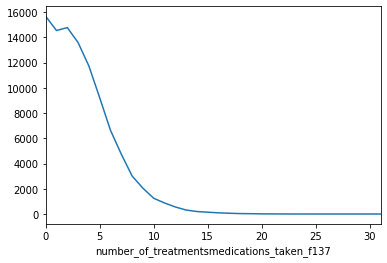

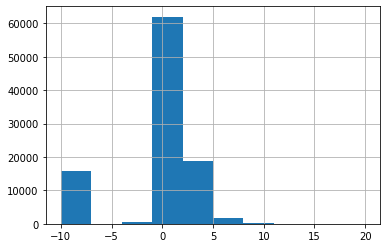

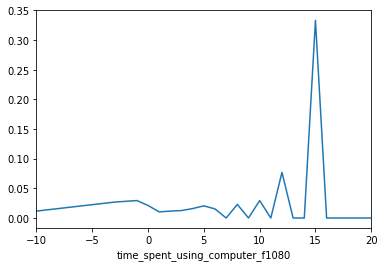

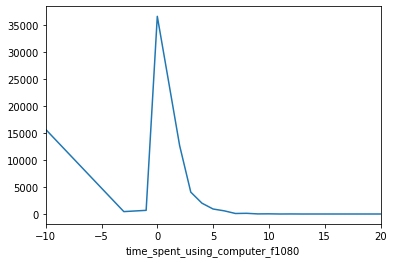

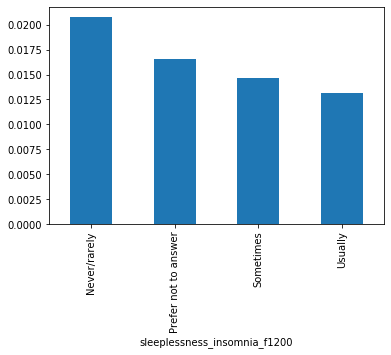

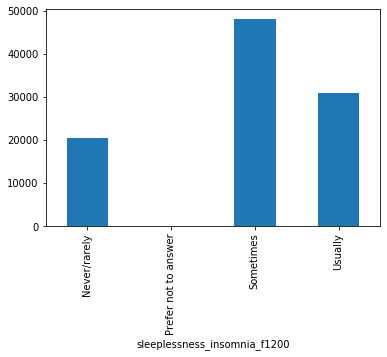

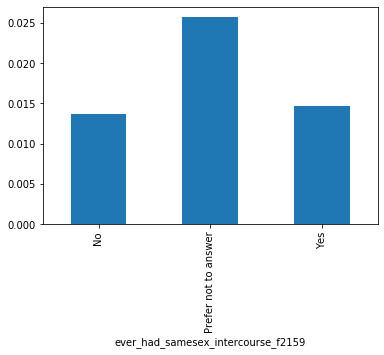

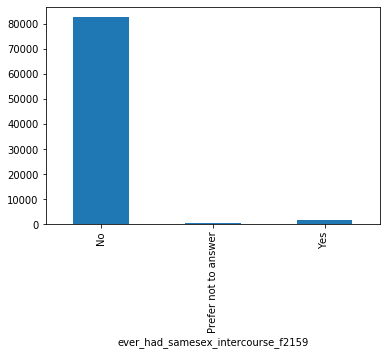

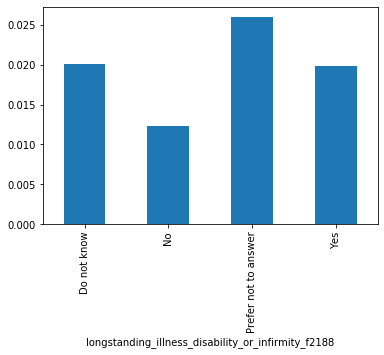

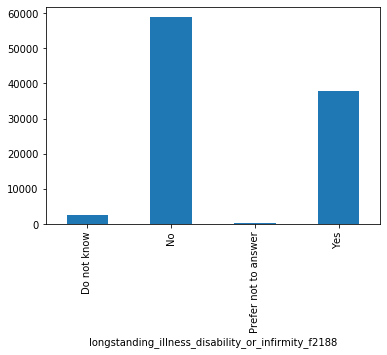

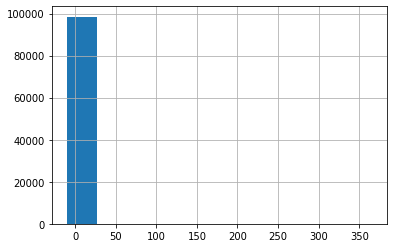

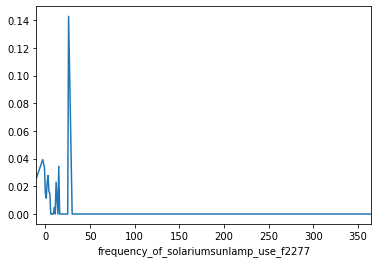

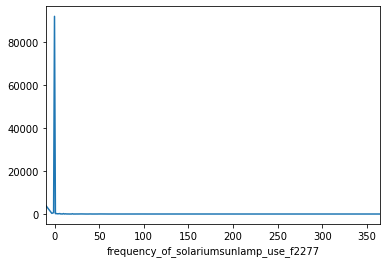

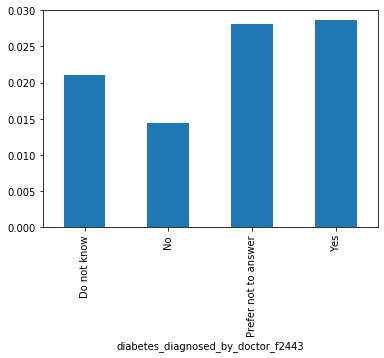

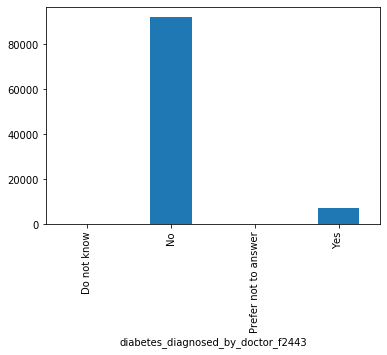

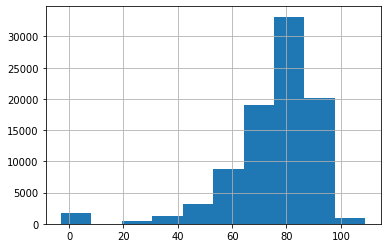

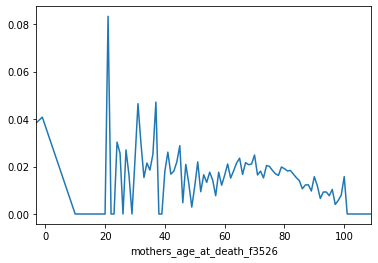

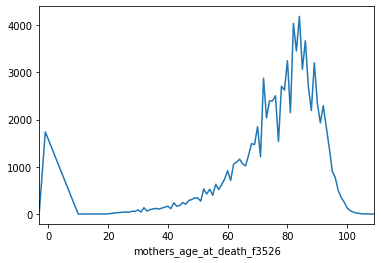

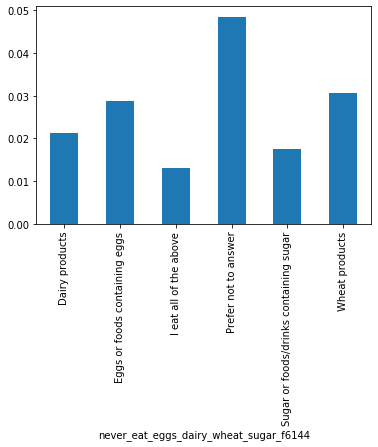

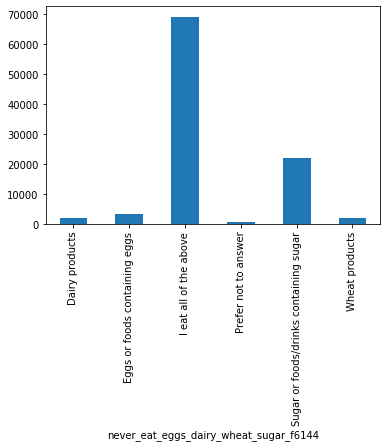

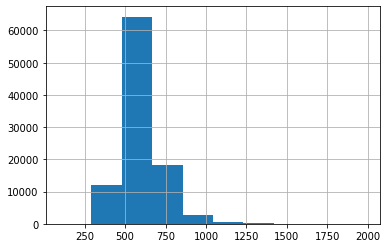

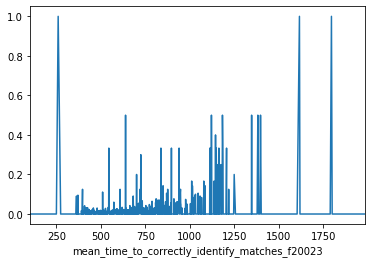

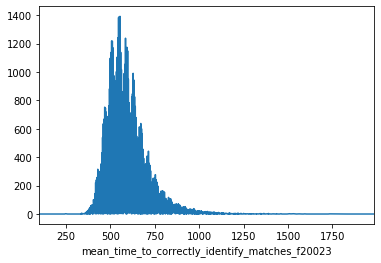

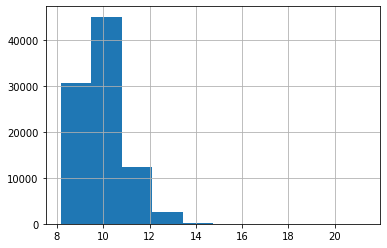

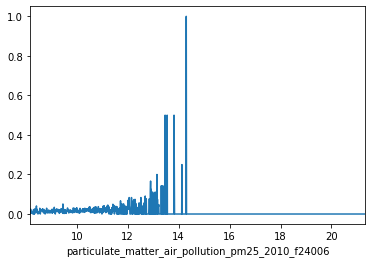

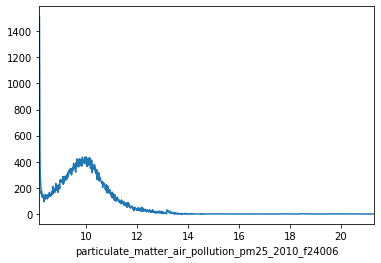

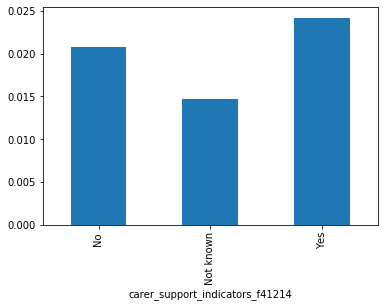

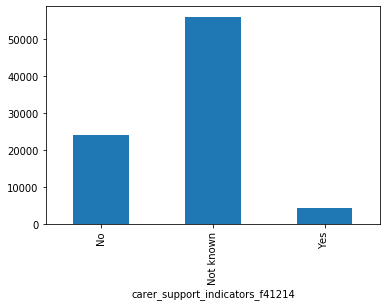

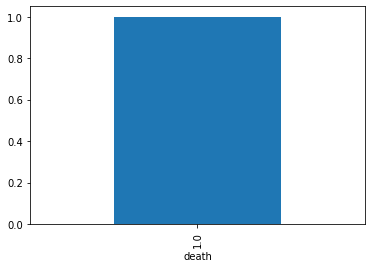

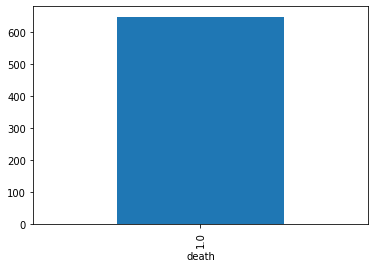

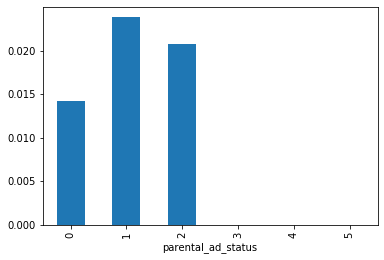

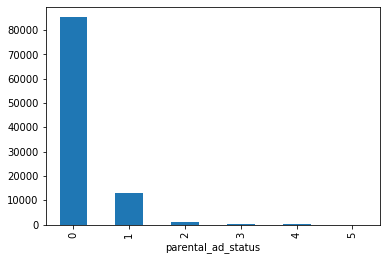

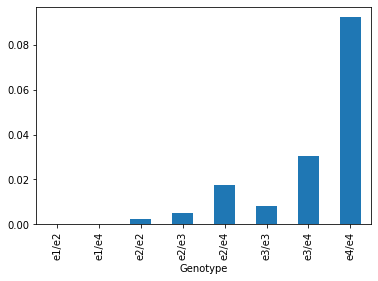

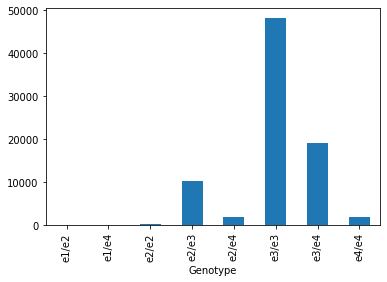

In [64]:
for var in shap_vars:
    if ukb_shap[var].nunique()<10:
       ukb_shap.groupby([var])['AD'].mean().plot(kind="bar")
       plt.show()
       ukb_shap.groupby([var]).size().plot(kind="bar")
       plt.show()
    if ukb_shap[var].nunique()>10 and ukb_shap[var].dtype=="float64":
       ukb_shap[var].hist()
       plt.show()
       ukb_shap.groupby([var])['AD'].mean().plot(kind="line")
       plt.show()
       ukb_shap.groupby([var]).size().plot(kind="line")
       plt.title=var
       plt.show()

In [24]:
ukb_shap['sleeplessness_insomnia_f1200'].count()/ukb_shap.shape[0]

0.9984454451543021

In [110]:
ukb_shap['mean_time_to_correctly_identify_matches_f20023']

0         656.0
1         509.0
2         633.0
3         598.0
4         540.0
          ...  
107879    765.0
107880    488.0
107881    664.0
107882    531.0
107883    622.0
Name: mean_time_to_correctly_identify_matches_f20023, Length: 107884, dtype: float64

In [90]:
col_filt=400000
cardin=100

ukb_cols_filt=[col for col in ukb_tp0.columns if 
               (ukb_tp0[col].count()>col_filt and len(ukb_tp0[col].value_counts())<cardin) 
               or col=='eid' or col in dis_vars]

ukb_filt0=ukb_tp0[ukb_cols_filt]

ukbfilttemp=pd.merge(ukb_filt0[['eid']],diseases_bin[dis_vars],left_on='eid',right_on='n_eid',how='left')
ukb_filt0[dis_vars]=ukbfilttemp[dis_vars]

age_mask=(ukb_filt0['Age_Today']>=75)

ukb_filt0=ukb_filt0[age_mask]

ukb_filt0['APOE4']=0
apoe_mask=(ukb_filt0['Genotype']=="e4/e4")|(ukb_filt0['Genotype']=="e3/e4")|(ukb_filt0['Genotype']=="e2/e4")
ukb_filt0['APOE4'][apoe_mask]=1

In [94]:
ukb_filt0['Age_Today'].max()

85.86849315068493

In [102]:
apoe_sum=pd.DataFrame(ukb_filt0.groupby(['APOE4']).agg({'AD':['mean']})).reset_index()
apoe_sum.columns=['APOE4','ADRate_avg']

,APOE4,ADRate_avg
0,0,0.008765
1,1,0.030282


In [106]:
def createvarsum(df,df1=apoe_sum):
    var_df=pd.DataFrame()
    for col in ukb_filt0.columns:
        if col !='eid' and col !='APOE4':
            df2=pd.DataFrame(df.groupby(['APOE4',col]).agg({'AD':['mean','count','sum']})).reset_index()
            df2.columns=['APOE4','breakdown','ADrate','recs','num_AD']
            df2=pd.merge(df2,df1,on='APOE4',how='inner')
            df2['ADrate']=df2['ADrate']/df2['ADRate_avg']
            df2['variable']=col
            var_df=pd.concat([var_df,df2],axis=0)
    return var_df

var_df=createvarsum(ukb_filt0,df1=apoe_sum)

In [107]:
var_df.to_csv('%s%s' % (path,'variablesummary.csv'))

In [180]:
ukb_tp0['AD']=ukb_tp0_dvars['AD']

In [173]:
ukb_tp0.to_csv('%s%s' % (path,'ukb_tp0.csv'))

In [78]:
df_full[(df_full['variable'].str.contains('matches'))]

,APOE4,breakdown,ADrate,recs,num_AD,ADRate_avg,variable
0,0,10,0.0,1,0.0,0.008765,rounded_matches_f20023
1,0,20,0.0,2,0.0,0.008765,rounded_matches_f20023
2,0,40,0.0,1,0.0,0.008765,rounded_matches_f20023
3,0,50,0.0,2,0.0,0.008765,rounded_matches_f20023
4,0,60,0.0,10,0.0,0.008765,rounded_matches_f20023
...,...,...,...,...,...,...,...
69,1,340,0.0,5,0.0,0.030282,rounded_matches_f20023
70,1,350,0.0,2,0.0,0.030282,rounded_matches_f20023
71,1,360,0.0,1,0.0,0.030282,rounded_matches_f20023
72,1,370,0.0,1,0.0,0.030282,rounded_matches_f20023


In [122]:
ukb_tp0_dvars=pd.merge(ukb_tp0[vars_analyse],
               diseases_bin[['n_eid','Age_Today','AD','Diag_Date_AD','years_bef_diagAD',
                           'date_of_attending_assessment_centre_f53', 'age_when_attended_assessment_centre_f21003',
                           'EPIL','DIAB','CELIAC','CERVASC','EPIL_bef','DIAB_bef']],
                      left_on='eid',right_on='n_eid',how='left')

In [125]:
ukb_tp0_score.columns

Index(['eid', 'Genotype', 'recent_feelings_of_depression_f20510',
       'sleeplessness_insomnia_f1200', 'parental_ad_status',
       'particulate_matter_air_pollution_pm25_2010_f24006',
       'number_of_symbol_digit_matches_made_correctly_f20159', 'sex_f31',
       'type_of_special_diet_followed_f20086',
       'ever_used_hormonereplacement_therapy_hrt_f2814', 'n_eid', 'Age_Today',
       'AD', 'Diag_Date_AD', 'years_bef_diagAD',
       'date_of_attending_assessment_centre_f53',
       'age_when_attended_assessment_centre_f21003', 'EPIL', 'DIAB', 'CELIAC',
       'CERVASC', 'EPIL_bef', 'DIAB_bef', 'mean_score', 'std_score'],
      dtype='object')

In [124]:
ukb_tp0_score=pd.merge(ukb_tp0_dvars,scoredf,on='eid',how='inner')

In [126]:
ukb_tp0_score.to_csv('%s%s' % (path,'ukb_tp0_score.csv'))

In [ ]:
def ageunits(df):
    ukb_time=df[['eid','Diag_Date_AD','AD','age_when_attended_assessment_centre_f21003',
                        'years_bef_diagAD', 'date_of_attending_assessment_centre_f53']]
    ukb_time['age']=ukb_time['age_when_attended_assessment_centre_f21003']
    ukb_time['years_fwd']=(dt.datetime.strptime('2020-01-01', '%Y-%m-%d')-\
    pd.to_datetime(ukb_time['date_of_attending_assessment_centre_f53'])).dt.days/365
    ukb_time=ukb_time[pd.notnull(ukb_time['years_fwd'])]

    ukb_time['time']=0
    new_rows = []
    for i, row in ukb_time.iterrows():
        for j in range(int(row['years_fwd'])): 
            row['time'] = j
            row['age']=row['age_when_attended_assessment_centre_f21003']+j
            newrow = row.copy()
            new_rows.append(newrow.values)


    ukb_time_full = pd.DataFrame(new_rows, columns=ukb_time.columns).reset_index()
    return ukb_time_full
    

In [ ]:
ukb_time_full=ageunits(ukb_tp0_dvars)

In [16]:
%%time
ukb_time=ukb_tp0_dvars[['eid','Diag_Date_AD','AD','age_when_attended_assessment_centre_f21003',
                        'years_bef_diagAD', 'date_of_attending_assessment_centre_f53']]

ukb_time['age']=ukb_time['age_when_attended_assessment_centre_f21003']
ukb_time['years_fwd']=(dt.datetime.strptime('2020-01-01', '%Y-%m-%d')-\
pd.to_datetime(ukb_time['date_of_attending_assessment_centre_f53'])).dt.days/365
ukb_time=ukb_time[pd.notnull(ukb_time['years_fwd'])]

ukb_time['time']=0
new_rows = []
for i, row in ukb_time.iterrows():
    for j in range(int(row['years_fwd'])): 
        row['time'] = j
        row['age']=row['age_when_attended_assessment_centre_f21003']+j
        newrow = row.copy()
        new_rows.append(newrow.values)
        

ukb_time_full = pd.DataFrame(new_rows, columns=ukb_time.columns).reset_index()

CPU times: user 25min 32s, sys: 43.4 s, total: 26min 15s
Wall time: 26min 15s


In [68]:
findcols(ukb_tp0_dvars,'CE')

['CELIAC']

In [25]:
ukb_time_full2=pd.merge(ukb_time,ukb_tp0_dvars[['eid','diagnosed_with_coeliac_disease_or_gluten_sensitivity_f21068',
                                               'EPIL','DIAB','EPIL_bef','DIAB_bef']],on='eid',how='left')

In [18]:
def drawline(df,varx,vary,huevar):
    plt.figure(figsize=(12, 8))
    sns.lineplot(data = df, x=varx, y=vary, hue=huevar)

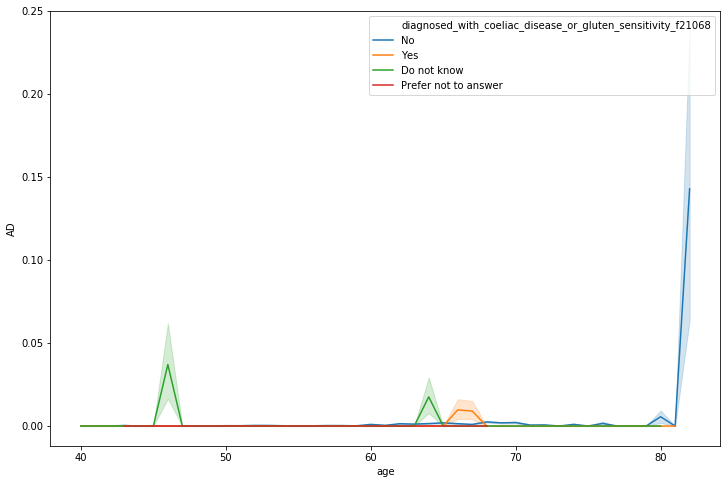

In [19]:
drawline(ukb_time_full2,"age","AD",'diagnosed_with_coeliac_disease_or_gluten_sensitivity_f21068')

In [96]:
ukb_tp0_dvars[(ukb_tp0_dvars['sex_f31']=="Female")].groupby(['ever_used_hormonereplacement_therapy_hrt_f2814'])['AD'].mean()

ever_used_hormonereplacement_therapy_hrt_f2814
Do not know             0.011127
No                      0.003351
Prefer not to answer    0.003788
Yes                     0.006556
Name: AD, dtype: float64

In [95]:
ukb_tp0_dvars['sex_f31'].value_counts()

Female    273378
Male      229115
Name: sex_f31, dtype: int64

In [94]:
findcols(ukb_tp0_dvars,'sex')

['sex_f31']

In [32]:
rule_coeliac=(ukb_tp0_dvars['diagnosed_with_coeliac_disease_or_gluten_sensitivity_f21068']=="Yes")
rule_coeliacno=(ukb_tp0_dvars['diagnosed_with_coeliac_disease_or_gluten_sensitivity_f21068']=="No")
rule_diaby=(ukb_tp0_dvars['DIAB_bef']==1)
rule_diabn=(ukb_tp0_dvars['DIAB_bef']==0)
rule_epily=(ukb_tp0_dvars['EPIL_bef']==1)
rule_epiln=(ukb_tp0_dvars['EPIL_bef']==0)
rule_age=(ukb_tp0_dvars['Age_Today']>75)
rule_AD=(ukb_tp0_dvars['AD']==1)

In [57]:
mask=(pd.isnull(ukb_tp0_dvars['diagnosed_with_coeliac_disease_or_gluten_sensitivity_f21068']))
ukb_tp0_dvars['diagnosed_with_coeliac_disease_or_gluten_sensitivity_f21068'][mask]="Missing"

In [75]:
findcols(ukb_tp0,'f20086')

['type_of_special_diet_followed_f20086']

In [81]:
ukb_tp0_dvars.groupby(['type_of_special_diet_followed_f20086'])['AD'].mean()

type_of_special_diet_followed_f20086
Gluten-free     0.004782
Lactose-free    0.002986
Low calorie     0.003086
Other           0.002945
Vegan           0.000000
Vegetarian      0.001918
Name: AD, dtype: float64

In [80]:
ukb_tp0_dvars.groupby(['AD'])['CERVASC'].sum()

TypeError: unsupported operand type(s) for +: 'int' and 'str'

In [31]:
print(ukb_tp0_dvars[rule_diaby&rule_age]['AD'].mean())
print(ukb_tp0_dvars[rule_diabn&rule_age]['AD'].mean())

0.009862064369960686
0.01331081752259859


In [33]:
print(ukb_tp0_dvars[rule_epily&rule_age]['AD'].mean())
print(ukb_tp0_dvars[rule_epiln&rule_age]['AD'].mean())

0.03458957150232318
0.012559871412763414


In [61]:
ukb_tp0_dvars[rule_coeliac&rule_age]

,eid,diagnosed_with_coeliac_disease_or_gluten_sensitivity_f21068,n_eid,Age_Today,AD,Diag_Date_AD,years_bef_diagAD,date_of_attending_assessment_centre_f53,age_when_attended_assessment_centre_f21003,EPIL,DIAB
812,1009346,Yes,1009346.0,81.024658,0.0,None,NaN,2008-09-25,69.0,0.0,0.0
3088,1035528,Yes,1035528.0,75.167123,0.0,None,NaN,2009-08-04,64.0,0.0,0.0
4067,1046921,Yes,1046921.0,78.608219,0.0,None,NaN,2010-02-24,68.0,0.0,0.0
7280,1083940,Yes,1083940.0,78.241096,0.0,None,NaN,2008-07-08,66.0,0.0,0.0
7553,1087036,Yes,1087036.0,75.717808,0.0,None,NaN,2009-01-15,64.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
491654,5180927,Yes,5180927.0,75.293151,0.0,None,NaN,2008-06-19,63.0,0.0,0.0
493032,5288215,Yes,5288215.0,78.353425,0.0,None,NaN,2010-05-28,68.0,0.0,0.0
494931,5436855,Yes,5436855.0,80.112329,0.0,None,NaN,2009-08-24,69.0,0.0,0.0
495076,5447330,Yes,5447330.0,80.301370,0.0,None,NaN,2009-06-16,69.0,0.0,0.0


In [52]:
ukb_tp0_dvars[rule_coeliacno].shape


(170094, 11)

In [58]:
ukb_tp0_dvars[rule_coeliacno&rule_age]['AD'].mean()

0.002160790231856222

In [59]:
ukb_tp0_dvars[rule_age]['AD'].mean()

0.013747538831765478

In [42]:
ukb_tp0_dvars.shape

(4117737, 13)

In [43]:
findcols(ukb_tp0,'APOE')

['APOE4_Carriers']

In [48]:
[col for col in ukb_tp0.columns if 'genotype' in col]

['chromosome_10_genotype_results_f22110',
 'chromosome_11_genotype_results_f22111',
 'chromosome_12_genotype_results_f22112',
 'chromosome_13_genotype_results_f22113',
 'chromosome_14_genotype_results_f22114',
 'chromosome_15_genotype_results_f22115',
 'chromosome_16_genotype_results_f22116',
 'chromosome_17_genotype_results_f22117',
 'chromosome_18_genotype_results_f22118',
 'chromosome_19_genotype_results_f22119',
 'chromosome_1_genotype_results_f22101',
 'chromosome_20_genotype_results_f22120',
 'chromosome_21_genotype_results_f22121',
 'chromosome_22_genotype_results_f22122',
 'chromosome_2_genotype_results_f22102',
 'chromosome_3_genotype_results_f22103',
 'chromosome_4_genotype_results_f22104',
 'chromosome_5_genotype_results_f22105',
 'chromosome_6_genotype_results_f22106',
 'chromosome_7_genotype_results_f22107',
 'chromosome_8_genotype_results_f22108',
 'chromosome_9_genotype_results_f22109',
 'chromosome_x_genotype_results_f22123',
 'chromosome_xy_genotype_results_f22100',
 '

In [44]:
ukb_tp0['APOE4_Carriers'].value_counts()

0.0    961404
1.0    324129
2.0     29496
Name: APOE4_Carriers, dtype: int64